
Simulated Patient Vitals
Heart Rate       : 76 bpm
Blood Pressure   : 102/108 mmHg
Glucose Level    : 216 mg/dL

Risk Category    : High
Advice           : Seek immediate medical attention.


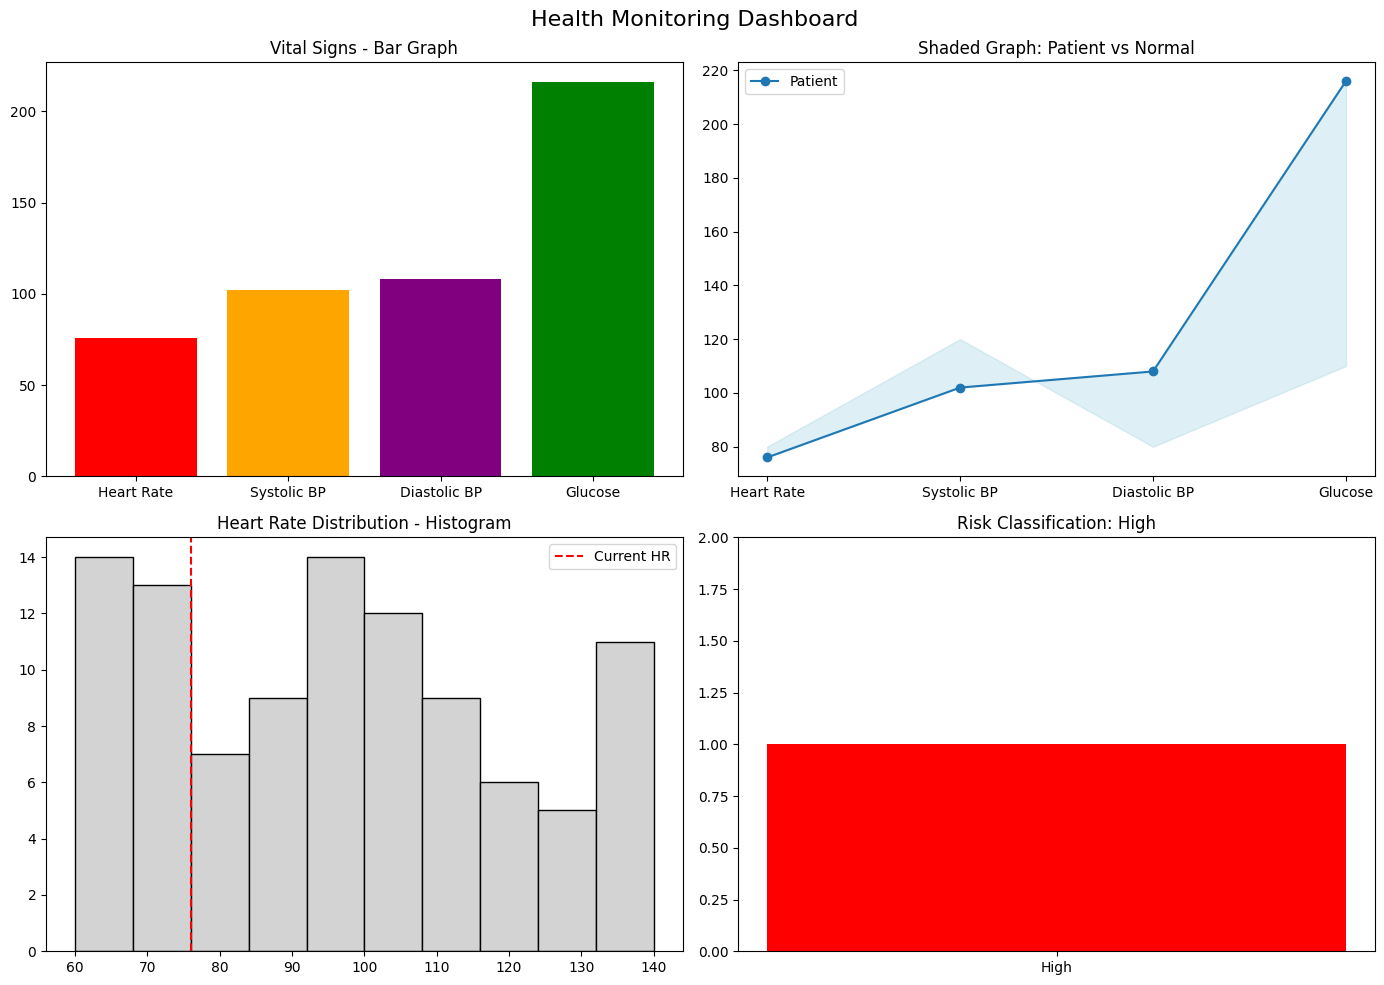

In [ ]:
# -----------------------------------------
# FINAL PROJECT: AI - POWERED HEALTH MONITOR
# -----------------------------------------
# Simulates patient vitals, classifies risk,
# recommends actions, and shows all types of graphs.
# -----------------------------------------

import random
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# ----------------------------
# 1. Simulate Patient Vitals
# ----------------------------
def simulate_vitals():
    heart_rate = random.randint(60, 140)        # Normal: 60 - 100 bpm
    systolic_bp = random.randint(90, 180)       # Normal: < 120 mmHg
    diastolic_bp = random.randint(60, 120)      # Normal: < 80 mmHg
    glucose_level = random.randint(70, 250)     # Normal: 70 – 140 mg/dL
    return heart_rate, systolic_bp, diastolic_bp, glucose_level

# ----------------------------
# 2. Risk Classification Logic
# ----------------------------
def classify_risk(hr, sys, dia, glucose):
    if hr > 110 or sys > 140 or dia > 90 or glucose > 180:
        return "High"
    elif hr > 90 or sys > 130 or dia > 85 or glucose > 150:
        return "Moderate"
    else:
        return "Low"

def health_advice(risk):
    if risk == "High":
        return "Seek immediate medical attention."
    elif risk == "Moderate":
        return "Monitor regularly and consult a doctor soon."
    else:
        return "All vitals within safe range."

# ----------------------------
# 3. Visualization Function
# ----------------------------
def show_all_graphs(hr, sys, dia, glucose, risk):
    fig, axs = plt.subplots(2, 2, figsize=(14, 10))
    fig.suptitle("Health Monitoring Dashboard", fontsize=16)

    # Bar Graph
    axs[0, 0].bar(['Heart Rate', 'Systolic BP', 'Diastolic BP', 'Glucose'],
                  [hr, sys, dia, glucose],
                  color=['red', 'orange', 'purple', 'green'])
    axs[0, 0].set_title("Vital Signs - Bar Graph")

    # Shaded Area Graph
    labels = ['Heart Rate', 'Systolic BP', 'Diastolic BP', 'Glucose']
    patient = [hr, sys, dia, glucose]
    normal = [80, 120, 80, 110]
    axs[0, 1].plot(labels, patient, marker='o', label='Patient')
    axs[0, 1].fill_between(labels, normal, patient, color='lightblue', alpha=0.4)
    axs[0, 1].set_title("Shaded Graph: Patient vs Normal")
    axs[0, 1].legend()

    # Histogram (Heart Rate Distribution)
    sample_hrs = [random.randint(60, 140) for _ in range(100)]
    axs[1, 0].hist(sample_hrs, bins=10, color='lightgray', edgecolor='black')
    axs[1, 0].axvline(hr, color='red', linestyle='--', label='Current HR')
    axs[1, 0].set_title("Heart Rate Distribution - Histogram")
    axs[1, 0].legend()

    # Risk Classification Block
    axs[1, 1].bar([risk], [1], color={'Low':'green', 'Moderate':'orange', 'High':'red'}[risk])
    axs[1, 1].set_title(f"Risk Classification: {risk}")
    axs[1, 1].set_ylim(0, 2)

    plt.tight_layout()
    plt.show()

    # Sankey Diagram – Health Data Flow
    sankey = go.Figure(data=[go.Sankey(
        node=dict(
            pad=15,
            thickness=20,
            line=dict(color="black", width=0.5),
            label=["Sensors", "Vitals Captured", "AI Risk Analysis", "Recommendation"],
            color=["blue", "lightblue", "violet", "green"]
        ),
        link=dict(
            source=[0, 1, 2],
            target=[1, 2, 3],
            value=[10, 10, 10]
        ))])
    sankey.update_layout(title_text="Sankey Diagram – Health Monitoring Flow", font_size=12)
    sankey.show()

# ----------------------------
# 4. Main Function Execution
# ----------------------------
def run_health_monitor():
    hr, sys, dia, glucose = simulate_vitals()
    risk = classify_risk(hr, sys, dia, glucose)
    advice = health_advice(risk)

    print("\nSimulated Patient Vitals")
    print(f"Heart Rate       : {hr} bpm")
    print(f"Blood Pressure   : {sys}/{dia} mmHg")
    print(f"Glucose Level    : {glucose} mg/dL")
    print(f"\nRisk Category    : {risk}")
    print(f"Advice           : {advice}")

    show_all_graphs(hr, sys, dia, glucose, risk)

# Run the program
run_health_monitor()